About Dataset
This dataset contains synthetic data collected from fitness trackers, detailing users' daily activities, exercise routines, heart rates, sleep patterns, and calorie consumption. It is designed to analyze health and fitness trends, optimize workout plans, and promote healthy lifestyle choices.

Columns:

user_id: Unique identifier for each user.

date: Date of the recorded data.

steps: Number of steps taken.

calories_burned: Total calories burned.

distance_km: Distance covered in kilometers.

active_minutes: Minutes spent in physical activity.

sleep_hours: Hours of sleep.

heart_rate_avg: Average heart rate.

workout_type: Type of workout performed (e.g., Running, Walking, Cycling).

weather_conditions: Weather conditions during the activity (e.g., Clear, Rain, Snow, Fog).

location: Location of the activity (e.g., Home, Gym, Park).

mood: Mood of the user (e.g., Happy, Neutral, Tired, Stressed).

The dataset can be used to track physical activity, monitor health metrics, personalize fitness programs, and study the effects of different exercises on health.

In [2]:
import numpy as np
import pandas as pd 
from datetime import datetime
# import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("D:\\Data Science\\Project\\user_activity_data\\user_activity_data.csv")
df = pd.DataFrame(data)

In [4]:
df.head()

,Unnamed: 0,user_id,date,workout_type,steps,active_minutes,distance_km,calories_burned,weather_conditions,location,mood,sleep_hours,heart_rate_avg
0,0,103.0,2023-06-10,Swimming,10109,18,7.71 KM,420.992707,Clear,Home,Happy,8.463019,50.000000
1,1,436.0,2023-08-03,Cycling,6431,53,4.9 KM,619.237541,Clear,Park,Neutral,7.040949,50.000000
2,2,861.0,2023-02-15,Running,7307,34,5.57 KM,567.981569,Clear,Office,Tired,4.959260,101.611687
3,3,271.0,2023-04-15,Walking,4918,11,3.75 KM,165.638288,Rain,Other,Stressed,NaN,50.000000
4,4,107.0,2023-06-19,Walking,9605,36,7.32 KM,630.940066,Fog,Gym,Neutral,5.615268,NaN


In [5]:
#removing unwanted column 'Unnamed'
df = df.drop(columns=['Unnamed: 0'])
df.head()

,user_id,date,workout_type,steps,active_minutes,distance_km,calories_burned,weather_conditions,location,mood,sleep_hours,heart_rate_avg
0,103.0,2023-06-10,Swimming,10109,18,7.71 KM,420.992707,Clear,Home,Happy,8.463019,50.000000
1,436.0,2023-08-03,Cycling,6431,53,4.9 KM,619.237541,Clear,Park,Neutral,7.040949,50.000000
2,861.0,2023-02-15,Running,7307,34,5.57 KM,567.981569,Clear,Office,Tired,4.959260,101.611687
3,271.0,2023-04-15,Walking,4918,11,3.75 KM,165.638288,Rain,Other,Stressed,NaN,50.000000
4,107.0,2023-06-19,Walking,9605,36,7.32 KM,630.940066,Fog,Gym,Neutral,5.615268,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             89856 non-null   float64
 1   date                100000 non-null  object 
 2   workout_type        100000 non-null  object 
 3   steps               100000 non-null  int64  
 4   active_minutes      100000 non-null  int64  
 5   distance_km         100000 non-null  object 
 6   calories_burned     100000 non-null  float64
 7   weather_conditions  100000 non-null  object 
 8   location            97625 non-null   object 
 9   mood                100000 non-null  object 
 10  sleep_hours         93408 non-null   float64
 11  heart_rate_avg      94491 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 9.2+ MB


In [7]:
df.describe()

,user_id,steps,active_minutes,calories_burned,sleep_hours,heart_rate_avg
count,89856.000000,100000.000000,100000.000000,100000.000000,93408.000000,94491.000000
mean,501.023716,7155.281450,30.180720,497.882445,6.999432,51.860226
std,288.655212,3739.095891,13.771677,1563.241598,1.489513,5.892031
min,1.000000,-14332.000000,10.000000,80.000000,3.000000,50.000000
25%,252.000000,5308.000000,19.000000,326.982259,5.981946,50.000000
50%,501.000000,7396.000000,30.000000,423.666792,6.999082,50.000000
75%,751.000000,9459.000000,40.000000,533.121421,8.008401,50.000000
max,999.000000,21350.000000,94.000000,49847.000000,12.000000,136.435310


Here we can see there are negative unwanted values in steps and the are outliers such as in sleep (min is 0) (we will discover it more with box blot)

In [8]:
df=df[df['steps'] >= 0] # removing the negative 'steps' values

In [9]:
df.nunique()

user_id                 999
date                    365
workout_type              6
steps                 13964
active_minutes           84
distance_km            1308
calories_burned       97372
weather_conditions        5
location                  5
mood                      4
sleep_hours           90844
heart_rate_avg        14617
dtype: int64

In [10]:
df.isnull().sum()

user_id               9880
date                     0
workout_type             0
steps                    0
active_minutes           0
distance_km              0
calories_burned          0
weather_conditions       0
location              2323
mood                     0
sleep_hours           6447
heart_rate_avg        5378
dtype: int64

In [11]:
# remove "KM" at the end of distance_km and
# conveting it from string to float
df['distance_km'] = df['distance_km'].str.replace(' KM','').astype(float)


In [12]:
df = df.dropna(subset=["user_id"])
df['user_id']=df['user_id'].astype(int)

In [13]:
df['calories_burned'] = df['calories_burned'].astype(int)

In [14]:
# conveting 'active_minutes' from int to float
df['active_minutes'] = df['active_minutes'].astype(float) 

In [15]:
df.isnull().sum()

user_id                  0
date                     0
workout_type             0
steps                    0
active_minutes           0
distance_km              0
calories_burned          0
weather_conditions       0
location              2062
mood                     0
sleep_hours           5793
heart_rate_avg        4827
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x267a90ee210>,
 'caps': [<matplotlib.lines.Line2D at 0x267a90ee490>,
 'boxes': [<matplotlib.lines.Line2D at 0x267a90ee0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x267a90ee710>],
 'fliers': [<matplotlib.lines.Line2D at 0x267a90ee850>],
 'means': []}

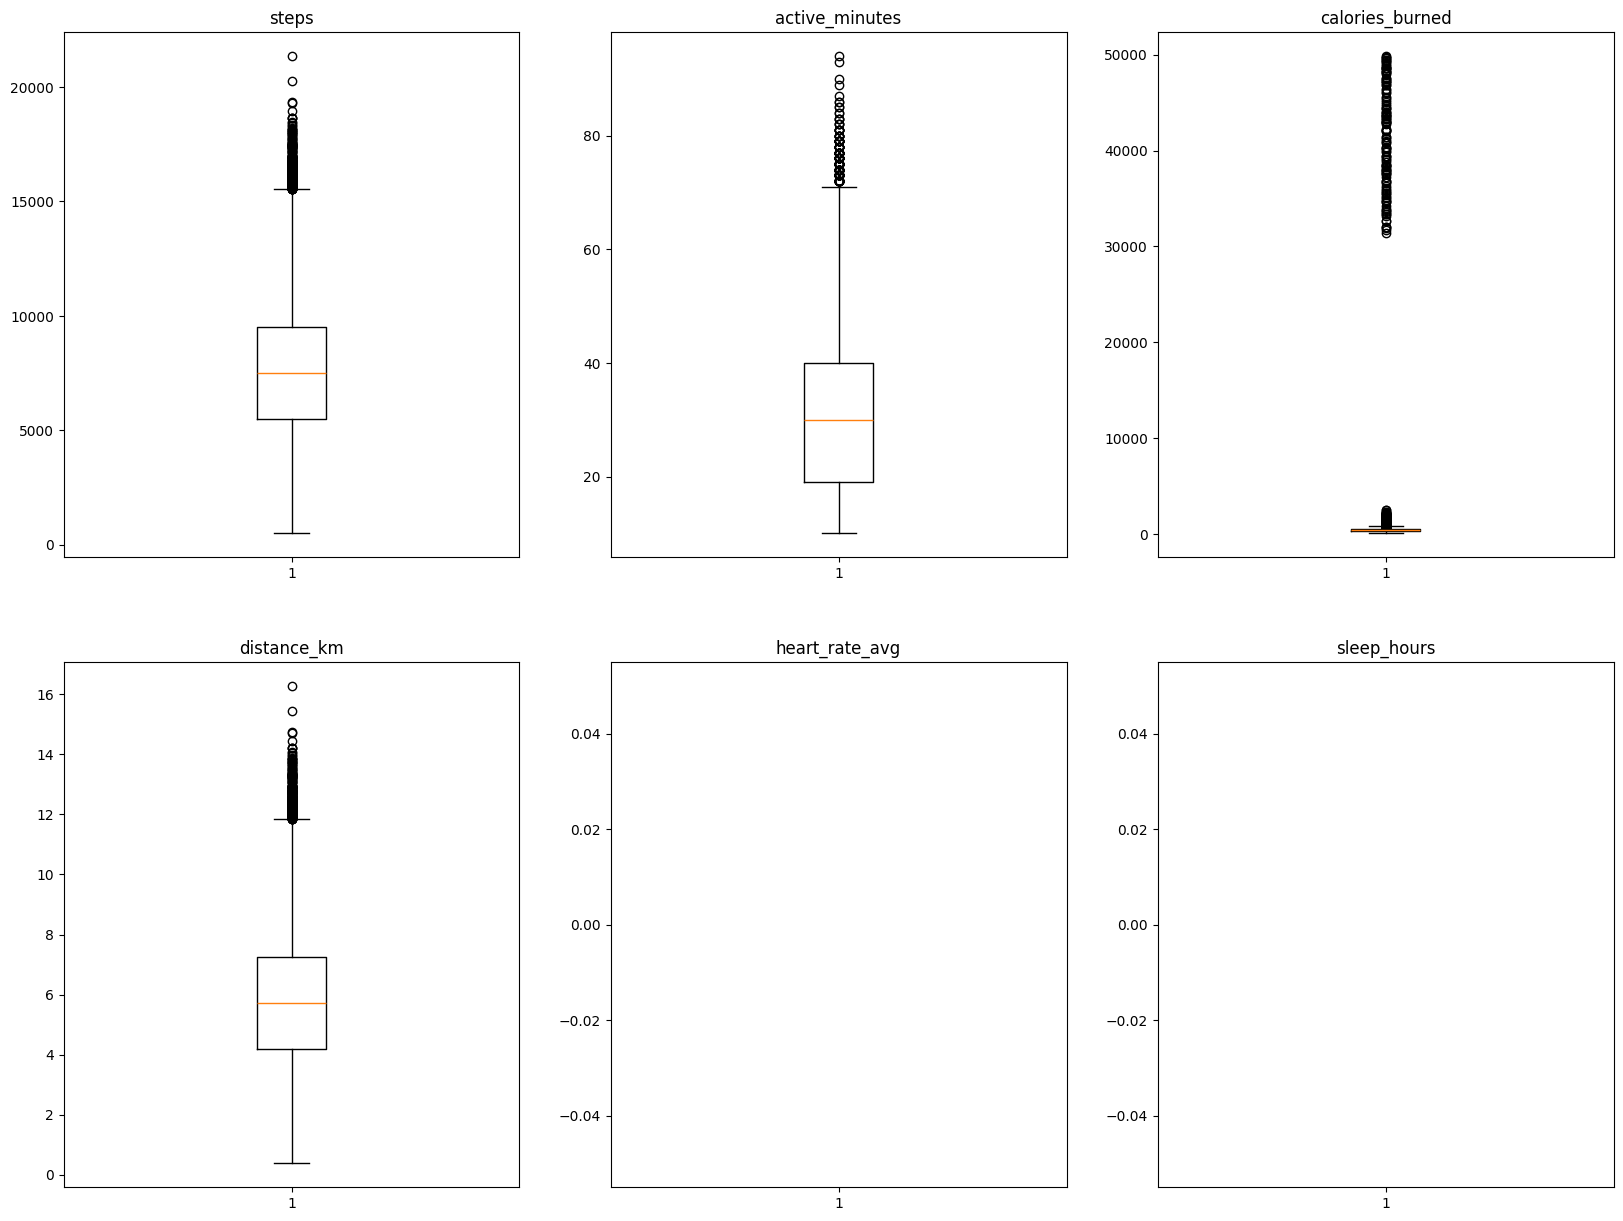

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
ax[0][0].set_title("steps")
ax[0][0].boxplot(df['steps'])

ax[0][1].set_title("active_minutes")
ax[0][1].boxplot(df['active_minutes'])

ax[0][2].set_title("calories_burned")
ax[0][2].boxplot(df['calories_burned'])

ax[1][0].set_title("distance_km")
ax[1][0].boxplot(df['distance_km'])

ax[1][1].set_title("heart_rate_avg")
ax[1][1].boxplot(df['heart_rate_avg'])

ax[1][2].set_title("sleep_hours")
ax[1][2].boxplot(df['sleep_hours'])

In [17]:
# Calculate Q1, Q3, and IQR
sQ1 = df['steps'].quantile(0.25)  # 25th percentile
sQ3 = df['steps'].quantile(0.75)  # 75th percentile
sIQR = sQ3 - sQ1

# Define outlier range
lower_bound = sQ1 - 1.5 * sIQR
upper_bound1 = sQ3 + 1.5 * sIQR

print(sQ1,sQ3,sIQR,lower_bound,upper_bound1)
df.loc[df['steps'] > upper_bound1, 'steps'] = int(upper_bound1)

5480.0 9507.0 4027.0 -560.5 15547.5


In [18]:
# Calculate Q1, Q3, and IQR
Q1 = df['active_minutes'].quantile(0.25)  # 25th percentile
Q3 = df['active_minutes'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(Q1,Q3,IQR,lower_bound,upper_bound)
df.loc[df['active_minutes'] > upper_bound, 'active_minutes'] = upper_bound

19.0 40.0 21.0 -12.5 71.5


In [19]:

# Calculate Q1, Q3, and IQR
Q1 = df['calories_burned'].quantile(0.25)  # 25th percentile
Q3 = df['calories_burned'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(Q1,Q3,IQR,lower_bound,upper_bound)
df.loc[df['calories_burned'] > upper_bound,'calories_burned'] = int(upper_bound)

327.0 533.0 206.0 18.0 842.0


In [20]:
# Calculate Q1, Q3, and IQR
Q1 = df['distance_km'].quantile(0.25)  # 25th percentile
Q3 = df['distance_km'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(Q1,Q3,IQR,lower_bound,upper_bound)
df.loc[df['distance_km'] > upper_bound,'distance_km'] = upper_bound

4.18 7.25 3.0700000000000003 -0.4250000000000007 11.855


In [21]:
Q1 = df['sleep_hours'].quantile(0.25)  # 25th percentile
Q3 = df['sleep_hours'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(Q1,Q3,IQR,lower_bound,upper_bound)
df.loc[df['sleep_hours'] > upper_bound,'sleep_hours'] = upper_bound
df.loc[df['sleep_hours'] < lower_bound,'sleep_hours'] = lower_bound

5.982139941490615 8.010279562779592 2.028139621288977 2.9399305095571497 11.052488994713059


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87762 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             87762 non-null  int64  
 1   date                87762 non-null  object 
 2   workout_type        87762 non-null  object 
 3   steps               87762 non-null  int64  
 4   active_minutes      87762 non-null  float64
 5   distance_km         87762 non-null  float64
 6   calories_burned     87762 non-null  int64  
 7   weather_conditions  87762 non-null  object 
 8   location            85700 non-null  object 
 9   mood                87762 non-null  object 
 10  sleep_hours         81969 non-null  float64
 11  heart_rate_avg      82935 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 8.7+ MB


In [23]:
df.describe()

,user_id,steps,active_minutes,distance_km,calories_burned,sleep_hours,heart_rate_avg
count,87762.000000,87762.000000,87762.000000,87762.00000,87762.000000,81969.000000,82935.000000
mean,500.933103,7497.716096,30.201801,5.71474,437.026105,6.999645,51.862169
std,288.706593,2957.188009,13.730762,2.25403,152.929792,1.487068,5.895769
min,1.000000,500.000000,10.000000,0.38000,80.000000,3.000000,50.000000
25%,251.000000,5480.000000,19.000000,4.18000,327.000000,5.982140,50.000000
50%,501.000000,7490.000000,30.000000,5.71000,424.000000,6.999877,50.000000
75%,751.000000,9507.000000,40.000000,7.25000,533.000000,8.010280,50.000000
max,999.000000,15547.000000,71.500000,11.85500,842.000000,11.052489,136.435310


{'whiskers': [<matplotlib.lines.Line2D at 0x267a938e710>,
 'caps': [<matplotlib.lines.Line2D at 0x267a938e990>,
 'boxes': [<matplotlib.lines.Line2D at 0x267a938e5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x267a938ec10>],
 'fliers': [<matplotlib.lines.Line2D at 0x267a938ed50>],
 'means': []}

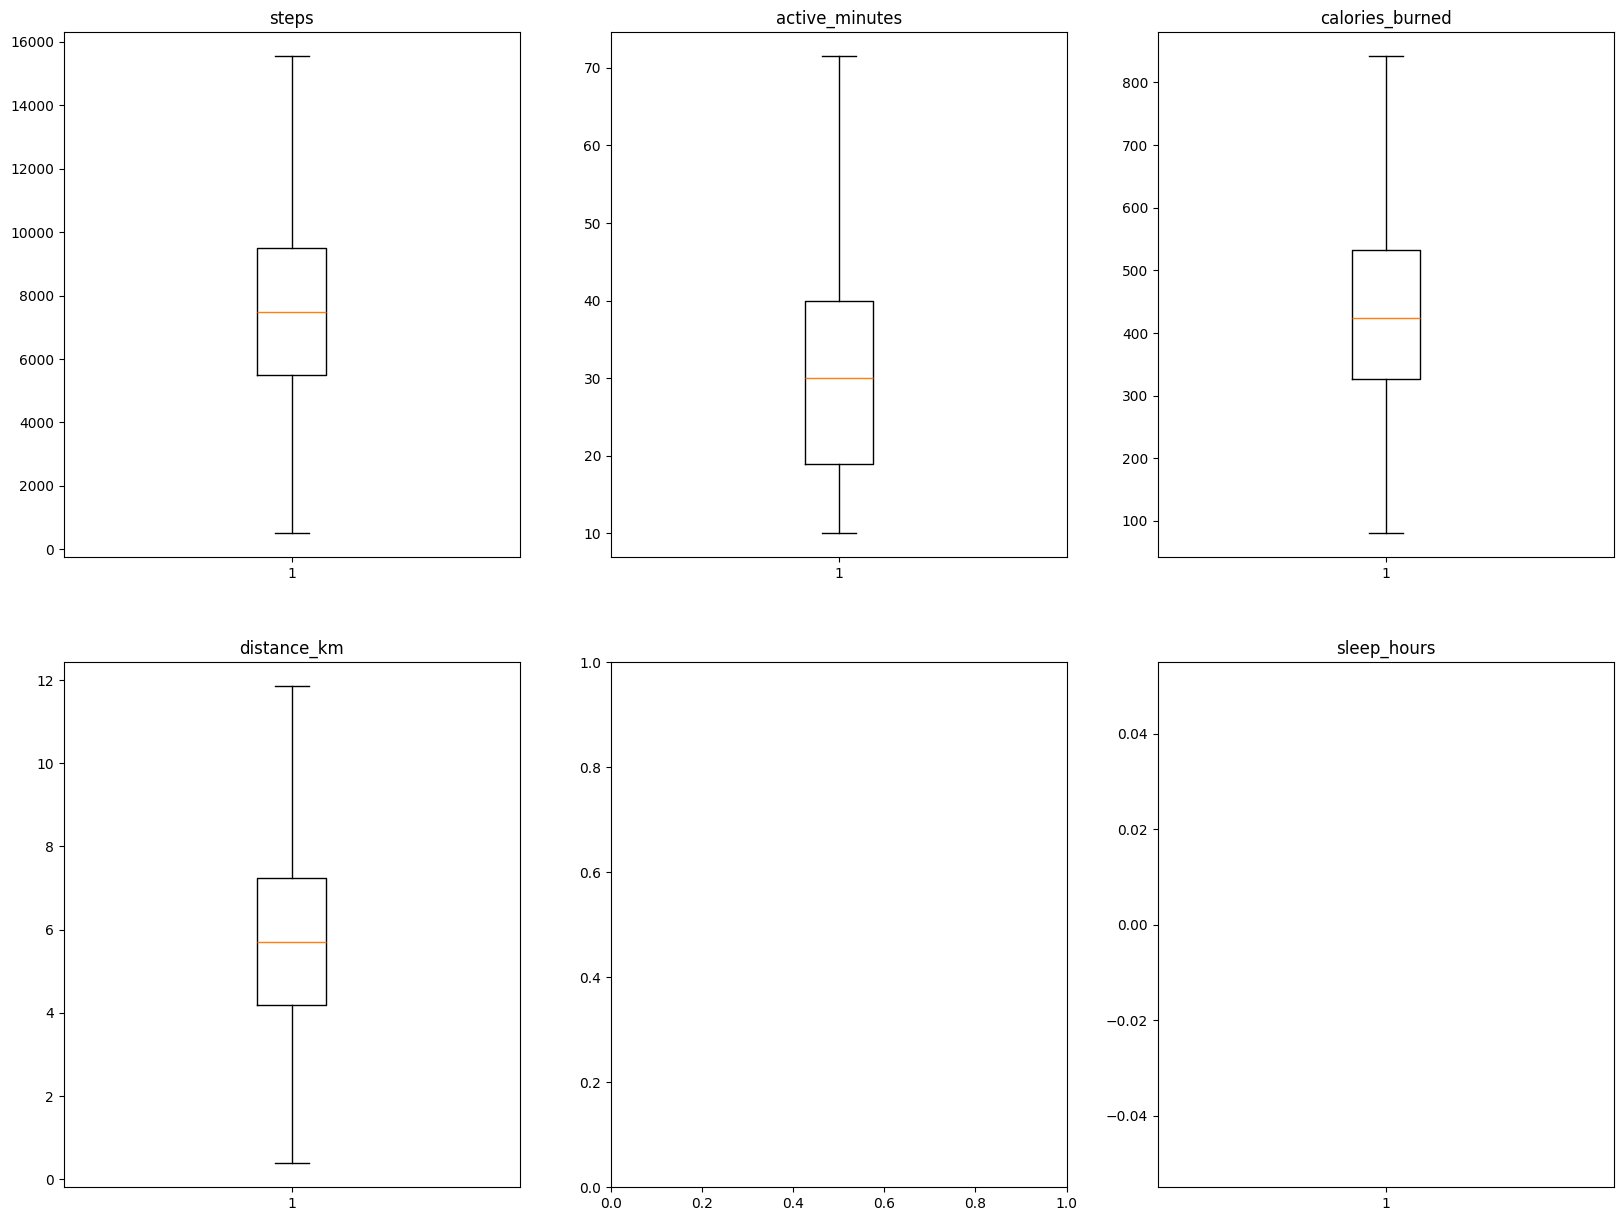

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
ax[0][0].set_title("steps")
ax[0][0].boxplot(df['steps'])

ax[0][1].set_title("active_minutes")
ax[0][1].boxplot(df['active_minutes'])

ax[0][2].set_title("calories_burned")
ax[0][2].boxplot(df['calories_burned'])

ax[1][0].set_title("distance_km")
ax[1][0].boxplot(df['distance_km'])

ax[1][2].set_title("sleep_hours")
ax[1][2].boxplot(df['sleep_hours'])


{'whiskers': [<matplotlib.lines.Line2D at 0x267a94ec2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x267a94ec550>,
 'boxes': [<matplotlib.lines.Line2D at 0x267a94ec190>],
 'medians': [<matplotlib.lines.Line2D at 0x267a94ec7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x267a94ec910>],
 'means': []}

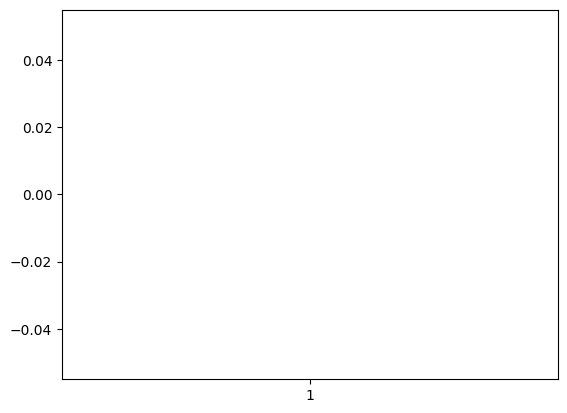

In [25]:
plt.boxplot(df['heart_rate_avg'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87762 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             87762 non-null  int64  
 1   date                87762 non-null  object 
 2   workout_type        87762 non-null  object 
 3   steps               87762 non-null  int64  
 4   active_minutes      87762 non-null  float64
 5   distance_km         87762 non-null  float64
 6   calories_burned     87762 non-null  int64  
 7   weather_conditions  87762 non-null  object 
 8   location            85700 non-null  object 
 9   mood                87762 non-null  object 
 10  sleep_hours         81969 non-null  float64
 11  heart_rate_avg      82935 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 8.7+ MB


In [27]:
# replacing null values from "location" with a random existing value like
import random

#Gym Workout,Cycling,Walking,Yoga,Swimming,Running  
non_null_values = df['location'].dropna().values 

df['location'] = df['location'].apply(
    lambda x: np.random.choice(non_null_values) if pd.isnull(x) else x
)

print(df['location'].isnull().sum())
df.location.value_counts()

0


location
Home      17714
Gym       17586
Office    17570
Park      17532
Other     17360
Name: count, dtype: int64

['Swimming' 'Cycling' 'Running' 'Walking' 'Gym Workout' 'Yoga']
workout_type
Walking        21974
Running        17563
Gym Workout    17534
Cycling        12994
Yoga            8878
Swimming        8819
Name: count, dtype: int64


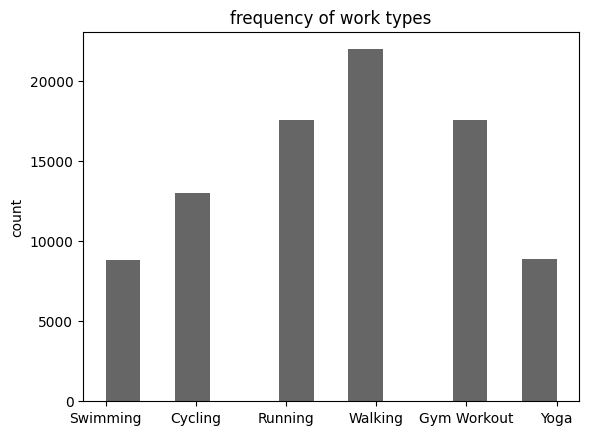

In [28]:
Workout=df['workout_type'].dropna().unique()
print(Workout)
print(df.workout_type.value_counts())
plt.hist(df['workout_type'],alpha=0.6,bins=13,color='black')
plt.ylabel("count")
plt.title("frequency of work types")
plt.show()

['Clear' 'Rain' 'Fog' 'unkown' 'Snow']
weather_conditions
Clear     43127
Rain      17987
Fog       10620
unkown    10279
Snow       5749
Name: count, dtype: int64


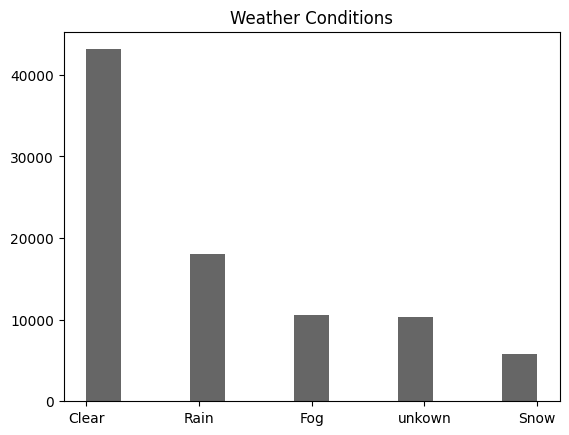

In [29]:
weather_conditions =df['weather_conditions'].dropna().unique()
print(weather_conditions)

print(df.weather_conditions.value_counts())
plt.hist(df['weather_conditions'],alpha=0.6,bins=13,color='black')
plt.title('Weather Conditions')
plt.show()

we can see that there is invalid data "unkown"

In [30]:
#replacing with mod "Clear"
df['weather_conditions'] = df['weather_conditions'].apply(
    lambda x: 'Clear' if x == 'unkown' else x
)
df.weather_conditions.value_counts()

weather_conditions
Clear    53406
Rain     17987
Fog      10620
Snow      5749
Name: count, dtype: int64

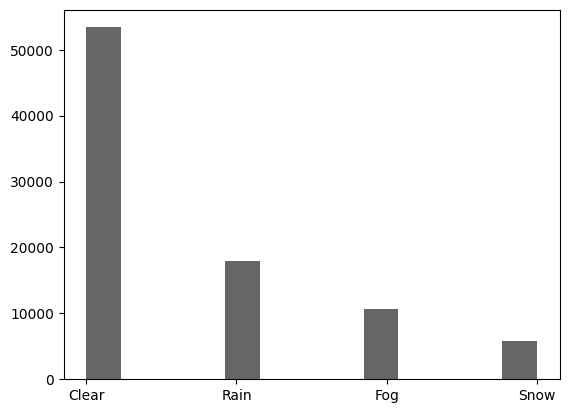

weather_conditions
Clear    53406
Rain     17987
Fog      10620
Snow      5749
Name: count, dtype: int64

In [31]:
plt.hist(df['weather_conditions'],alpha=0.6,bins=13,color='black')
plt.show()
df.weather_conditions.value_counts()

In [32]:
df.shape

(87762, 12)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87762 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             87762 non-null  int64  
 1   date                87762 non-null  object 
 2   workout_type        87762 non-null  object 
 3   steps               87762 non-null  int64  
 4   active_minutes      87762 non-null  float64
 5   distance_km         87762 non-null  float64
 6   calories_burned     87762 non-null  int64  
 7   weather_conditions  87762 non-null  object 
 8   location            87762 non-null  object 
 9   mood                87762 non-null  object 
 10  sleep_hours         81969 non-null  float64
 11  heart_rate_avg      82935 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 8.7+ MB


In [34]:
df.isnull().sum()

user_id                  0
date                     0
workout_type             0
steps                    0
active_minutes           0
distance_km              0
calories_burned          0
weather_conditions       0
location                 0
mood                     0
sleep_hours           5793
heart_rate_avg        4827
dtype: int64

In [35]:
df["date"]

0        2023-06-10
1        2023-08-03
2        2023-02-15
3        2023-04-15
4        2023-06-19
            ...    
99992    2023-01-15
99993    2023-03-24
99994    2023-12-15
99997    2023-07-25
99998    2023-03-19
Name: date, Length: 87762, dtype: object

In [36]:
# as date type in our data is string
df["date"] = pd.to_datetime(df["date"],format="%Y-%m-%d" , errors='coerce')

In [37]:
df = df.dropna(subset=["user_id"])

In [38]:
df.isnull().sum()

user_id                  0
date                     0
workout_type             0
steps                    0
active_minutes           0
distance_km              0
calories_burned          0
weather_conditions       0
location                 0
mood                     0
sleep_hours           5793
heart_rate_avg        4827
dtype: int64

In [39]:
df.shape

(87762, 12)

In [40]:
df.duplicated().any()

np.False_

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87762 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             87762 non-null  int64         
 1   date                87762 non-null  datetime64[ns]
 2   workout_type        87762 non-null  object        
 3   steps               87762 non-null  int64         
 4   active_minutes      87762 non-null  float64       
 5   distance_km         87762 non-null  float64       
 6   calories_burned     87762 non-null  int64         
 7   weather_conditions  87762 non-null  object        
 8   location            87762 non-null  object        
 9   mood                87762 non-null  object        
 10  sleep_hours         81969 non-null  float64       
 11  heart_rate_avg      82935 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 8.7+ MB


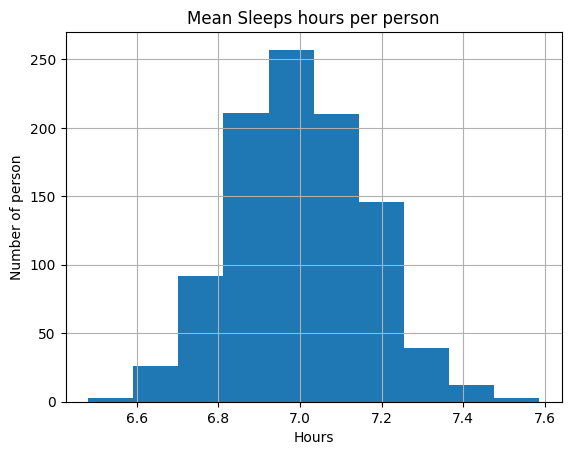

In [42]:
df.groupby('user_id').agg({
  'sleep_hours': 'mean'
}).hist()
plt.title("Mean Sleeps hours per person")
plt.xlabel("Hours")
plt.ylabel("Number of person")
plt.show()

We notice that it is approximately normally distributed we will fill by mean, mod or median

In [43]:
mean_sleep = df.groupby('user_id').agg({
  'sleep_hours': 'mean'
}).mean()

mean_sleep = mean_sleep.iloc[0]
print(mean_sleep)

df['sleep_hours'] = df['sleep_hours'].fillna(mean_sleep)

7.000066210863658


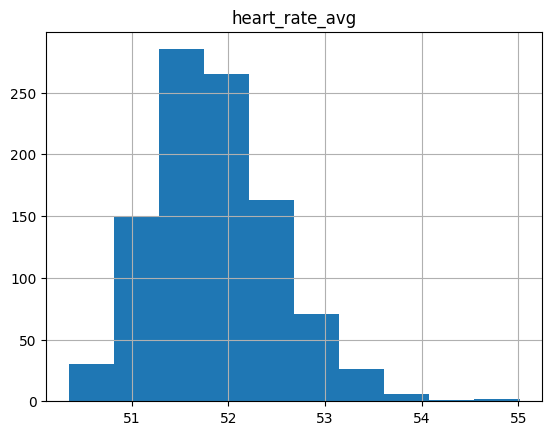

In [44]:
mean_sleep = df.groupby('user_id').agg({
  'heart_rate_avg': 'mean'
}).hist()

It is slightly positively skewed We chose median to fill with

In [45]:
heart_median = df.groupby('user_id').agg({
  'heart_rate_avg': 'median'
}).median()

heart_median = heart_median.iloc[0]
df['heart_rate_avg'] = df['heart_rate_avg'].fillna(heart_median)

In [46]:
df['user_id'] = df['user_id'].astype(int)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87762 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             87762 non-null  int64         
 1   date                87762 non-null  datetime64[ns]
 2   workout_type        87762 non-null  object        
 3   steps               87762 non-null  int64         
 4   active_minutes      87762 non-null  float64       
 5   distance_km         87762 non-null  float64       
 6   calories_burned     87762 non-null  int64         
 7   weather_conditions  87762 non-null  object        
 8   location            87762 non-null  object        
 9   mood                87762 non-null  object        
 10  sleep_hours         87762 non-null  float64       
 11  heart_rate_avg      87762 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 8.7+ MB


### Is there correlation between wellness of sleep and total calories burned at the day ?

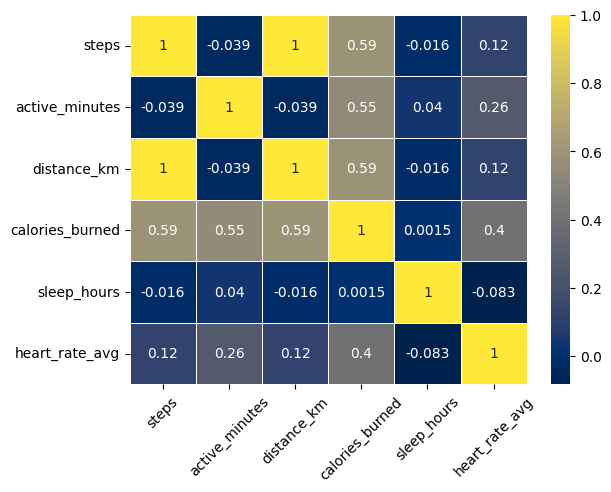

In [48]:
#correlation heatmap to check the correlation between two variables 

df_subset = df.drop(columns=['date', 'mood', 'location', 'weather_conditions', 'workout_type'])

df_subset = df_subset.groupby('user_id').mean()

sns.heatmap(df_subset.corr(),annot=True,cmap='cividis',linewidths=0.6)
plt.xticks(rotation=45)
plt.show()

Here we can derive that there is a strong correlation between features such as 
- calories burned and steps
- calories burned and active minutes
- It is shown that distance_km is the same as steps we can deselect one of them and use other in analsyis and visualizations

In [49]:
df.drop(columns=['distance_km'])

,user_id,date,workout_type,steps,active_minutes,calories_burned,weather_conditions,location,mood,sleep_hours,heart_rate_avg
0,103,2023-06-10,Swimming,10109,18.0,420,Clear,Home,Happy,8.463019,50.000000
1,436,2023-08-03,Cycling,6431,53.0,619,Clear,Park,Neutral,7.040949,50.000000
2,861,2023-02-15,Running,7307,34.0,567,Clear,Office,Tired,4.959260,101.611687
3,271,2023-04-15,Walking,4918,11.0,165,Rain,Other,Stressed,7.000066,50.000000
4,107,2023-06-19,Walking,9605,36.0,630,Fog,Gym,Neutral,5.615268,50.000000
...,...,...,...,...,...,...,...,...,...,...,...
99992,294,2023-01-15,Running,8094,32.0,493,Clear,Gym,Happy,8.695181,50.000000
99993,134,2023-03-24,Yoga,10057,21.0,403,Clear,Home,Happy,6.339906,50.000000
99994,404,2023-12-15,Gym Workout,6276,17.0,327,Clear,Office,Happy,8.846593,50.000000
99997,484,2023-07-25,Walking,2979,21.0,214,Clear,Office,Neutral,7.579240,50.000000


### How much time does people spend on gym ?

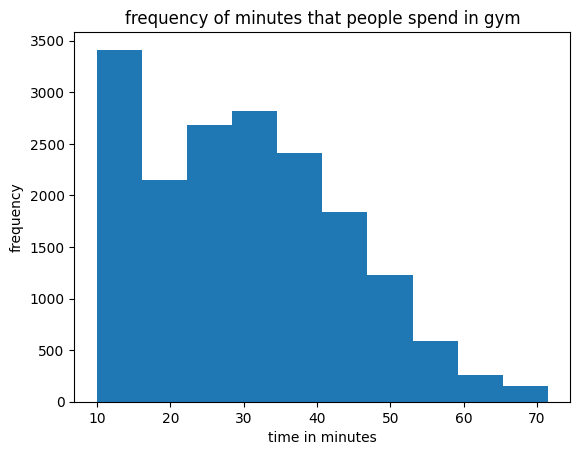

In [50]:
sub_df = df[df['workout_type'] == 'Gym Workout']['active_minutes']
plt.hist(sub_df)
plt.title("frequency of minutes that people spend in gym")
plt.xlabel("time in minutes")
plt.ylabel("frequency")
plt.show()

We can deduce that most people spend little time on gym

### Is there a day that people love to go to gym ?

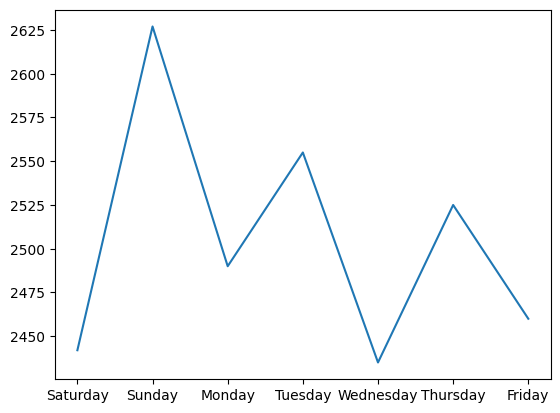

In [51]:
sub_df = df.copy()

# Get name of the day
sub_df['date'] = sub_df['date'].dt.day_name()

# 1 => person goes to gym in that day
# 0 => person does not go to gym in that day
sub_df['workout_type'] = sub_df['workout_type'].apply(
  lambda x: 1 if x == 'Gym Workout' else 0
)

sub_df = sub_df.groupby('date')['workout_type'].sum()

# sort by day of the week
new_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sub_df = sub_df.reindex(new_order)

plt.plot(sub_df)

We can derive that people love going to gym on Sunday

We can take decisions based on this visualization such as gym owner ensure that gym is well prepared and every thing in its place at these days

### How each sport from these affects the mood of a person?

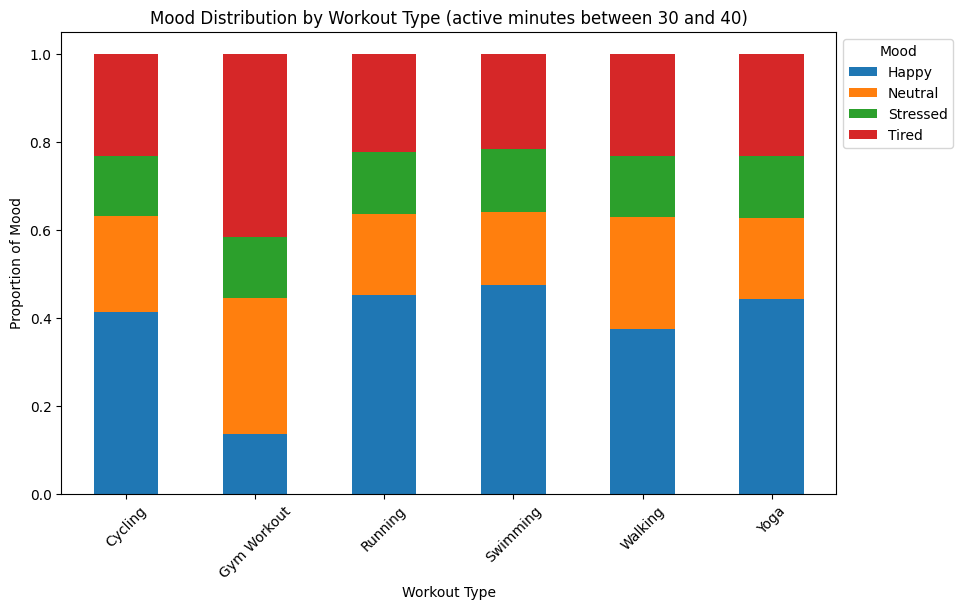

In [52]:
# Aggregate mood distribution by workout type
mood_distribution = df[(df['active_minutes'] >= 30) & (df['active_minutes'] <= 40)].groupby('workout_type')['mood'].value_counts(normalize=True).unstack().fillna(0)

# Plot the mood distribution for each workout type
mood_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Mood Distribution by Workout Type (active minutes between 30 and 40)')
plt.xlabel('Workout Type')
plt.ylabel('Proportion of Mood')
plt.xticks(rotation=45)
plt.legend(title='Mood', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

We can see notice that gym is more tiring than other sports

### What is the participation of each sport ?

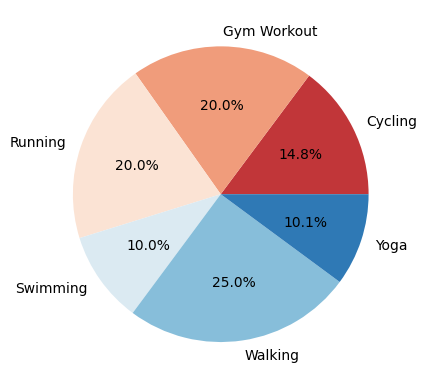

In [53]:
sub_df = df.groupby('workout_type')['user_id'].count()

data = sns.load_dataset('tips')
palette = sns.color_palette("RdBu", len(sub_df))

plt.pie(sub_df, labels=sub_df.index, autopct='%1.1f%%', colors=palette)
plt.show()

We can see the least percent is for Yoga and swimming There might be less places to play yoga in or to weather conditions in swimming

### How much weather conditions affects swimming ?

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_14280\2236572154.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_conditions', y='num_sessions', data=weather_swimming_stats, palette='Set2')


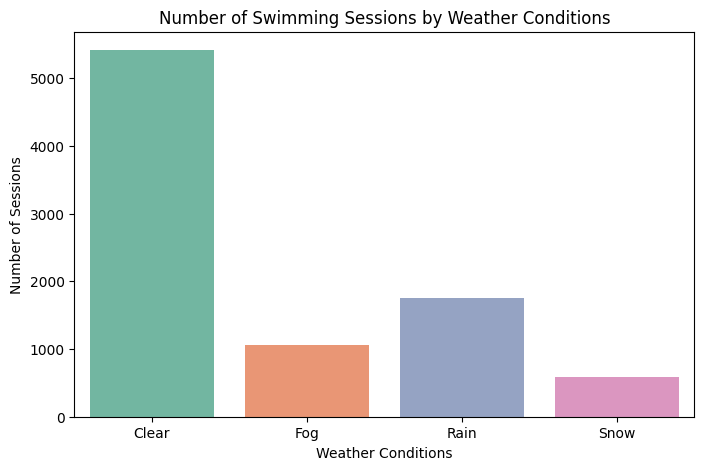

In [54]:
swimming_data = df[df['workout_type'] == 'Swimming']

# Group by weather conditions and analyze metrics
weather_swimming_stats = swimming_data.groupby('weather_conditions').agg(
  num_sessions=('user_id', 'count'),
  avg_active_minutes=('active_minutes', 'mean'),
  avg_calories_burned=('calories_burned', 'mean')
).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='weather_conditions', y='num_sessions', data=weather_swimming_stats, palette='Set2')
plt.title('Number of Swimming Sessions by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Sessions')
plt.show()

we can see that weather greatly affects do swimming so that less number of people do swimming

### How much each sport affects calories burning ?

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_14280\3304578402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='workout_type', y='calories_burned', palette='coolwarm')


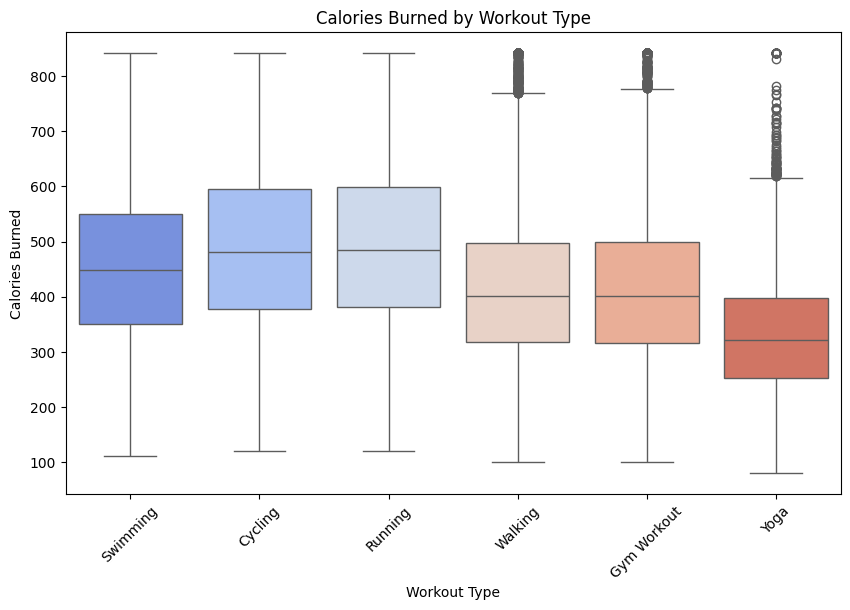

In [55]:
# Plot calories burned distribution by workout type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='workout_type', y='calories_burned', palette='coolwarm')
plt.title('Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.show()

- We can see that Yoga burn calories less than other sports we can conclude that it has less work out than others.

- Walking and gym workout is very similar.
- Running and Cycling are at the top.

### Number of steps effect on calories burned for each sport ?

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_14280\1037553423.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='steps', y='calories_burned', palette='Set2', alpha=0.7)


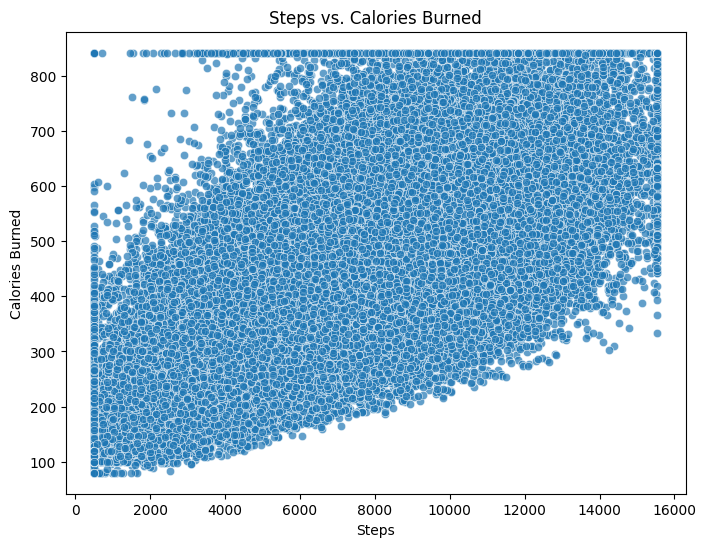

In [56]:
# Scatter plot for steps vs. calories burned
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='steps', y='calories_burned', palette='Set2', alpha=0.7)
plt.title('Steps vs. Calories Burned')
plt.xlabel('Steps')
plt.ylabel('Calories Burned')
plt.show()

- Number of steps is positivly correlated this calories burned for all sports
- Yoga is at the bottom of number of steps and calories burned

### How weather conditions affects wellingness of a person ?

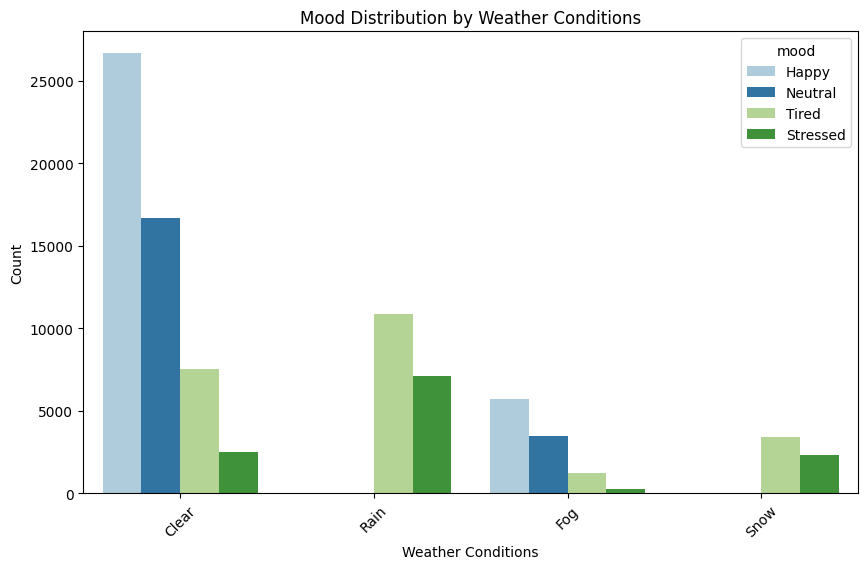

In [57]:
# Plot mood distribution by weather condition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather_conditions', hue='mood', palette='Paired')
plt.title('Mood Distribution by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We can conclude:
- when weather is clear person is more likely to be happy.
- In rain and snow weather conditions a person is more likely to be tired and stressed.

In [58]:
scalar=StandardScaler() 

Standardizing the data to ensure that all featuers contribute equally to the distance calculation.

In [59]:
df[['S_steps','S_calories_burned']]=scalar.fit_transform(df[['steps','calories_burned']])

df

,user_id,date,workout_type,steps,active_minutes,distance_km,calories_burned,weather_conditions,location,mood,sleep_hours,heart_rate_avg,S_steps,S_calories_burned
0,103,2023-06-10,Swimming,10109,18.0,7.71,420,Clear,Home,Happy,8.463019,50.000000,0.883034,-0.111333
1,436,2023-08-03,Cycling,6431,53.0,4.90,619,Clear,Park,Neutral,7.040949,50.000000,-0.360722,1.189925
2,861,2023-02-15,Running,7307,34.0,5.57,567,Clear,Office,Tired,4.959260,101.611687,-0.064493,0.849897
3,271,2023-04-15,Walking,4918,11.0,3.75,165,Rain,Other,Stressed,7.000066,50.000000,-0.872359,-1.778775
4,107,2023-06-19,Walking,9605,36.0,7.32,630,Fog,Gym,Neutral,5.615268,50.000000,0.712601,1.261854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,294,2023-01-15,Running,8094,32.0,6.17,493,Clear,Gym,Happy,8.695181,50.000000,0.201640,0.366012
99993,134,2023-03-24,Yoga,10057,21.0,7.67,403,Clear,Home,Happy,6.339906,50.000000,0.865450,-0.222496
99994,404,2023-12-15,Gym Workout,6276,17.0,4.78,327,Clear,Office,Happy,8.846593,50.000000,-0.413137,-0.719459
99997,484,2023-07-25,Walking,2979,21.0,2.27,214,Clear,Office,Neutral,7.579240,50.000000,-1.528054,-1.458364


Choosing steps and calories_burned columns to perfrom k-means on because they are strongly correlated , they are standardized and applied to the data

In [60]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df[['S_steps','S_calories_burned']])
    inertia.append(kmeans.inertia_)

c:\Users\Abdelrahman\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Abdelrahman\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Abdelrahman\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Abdelrahman\AppData\Local\Programs\Python\Python313\Lib\s

Determining the optimal num of clusters using the elbow method 

inertia: Sum of squared error

random_state=42: insures reproducibility

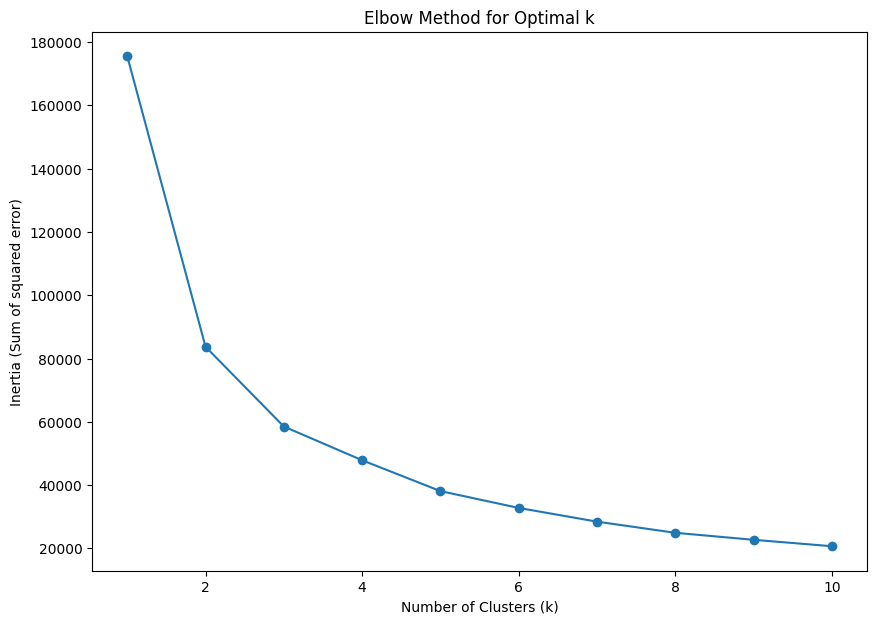

In [61]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared error)')
plt.title('Elbow Method for Optimal k')
plt.show()

Elbow method plot (elbow curve)

here we can deduce that 3 is an optimal num of clusters 

In [62]:
k_optimal = 3  # Choose k based on the Elbow curve
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['S_steps','S_calories_burned']])

df.head()

,user_id,date,workout_type,steps,active_minutes,distance_km,calories_burned,weather_conditions,location,mood,sleep_hours,heart_rate_avg,S_steps,S_calories_burned,cluster
0,103,2023-06-10,Swimming,10109,18.0,7.71,420,Clear,Home,Happy,8.463019,50.000000,0.883034,-0.111333,2
1,436,2023-08-03,Cycling,6431,53.0,4.90,619,Clear,Park,Neutral,7.040949,50.000000,-0.360722,1.189925,2
2,861,2023-02-15,Running,7307,34.0,5.57,567,Clear,Office,Tired,4.959260,101.611687,-0.064493,0.849897,2
3,271,2023-04-15,Walking,4918,11.0,3.75,165,Rain,Other,Stressed,7.000066,50.000000,-0.872359,-1.778775,0
4,107,2023-06-19,Walking,9605,36.0,7.32,630,Fog,Gym,Neutral,5.615268,50.000000,0.712601,1.261854,1


K-means is performed on the given data , and a cluster is assigned to every record

In [63]:
kmeans.cluster_centers_

array([[-1.1086274 , -0.98638056],
       [ 1.06731548,  1.24417457],
       [ 0.12071336, -0.05680525]])

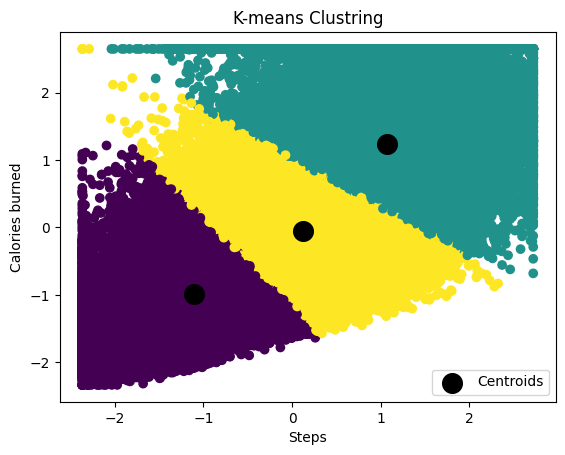

In [64]:
plt.scatter(x=df['S_steps'],y=df['S_calories_burned'],c=df['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c='black', s=200, label='Centroids')
plt.xlabel('Steps')
plt.ylabel('Calories burned')
plt.title('K-means Clustring')
plt.legend()
plt.show()